In [1]:
# 阶段二模块三作业：使用K-Means对请客户进行分群

In [2]:
import numpy as np
import pandas as pd

### 导入数据

In [3]:
data = pd.read_csv('./Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


### 查看数据信息

In [8]:
#查看数据缺失值---数据并没有缺失值，数据完整性比较好
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


-Fresh列到Delicassen列的数据数量级大小差别很大，在聚类前需要进行标准化

### 数据预处理

In [10]:
#在此使用Normalizer---使用方法同MinMaxScaler、StandardScaler
from sklearn.preprocessing import Normalizer 

In [11]:
normalizer = Normalizer().fit(data)
data = normalizer.transform(data)
data

array([[1.11821406e-04, 1.67732109e-04, 7.08332695e-01, ...,
        1.19648904e-02, 1.49505220e-01, 7.48085205e-02],
       [1.25321880e-04, 1.87982820e-04, 4.42198253e-01, ...,
        1.10408576e-01, 2.06342475e-01, 1.11285829e-01],
       [1.24839188e-04, 1.87258782e-04, 3.96551681e-01, ...,
        1.50119124e-01, 2.19467293e-01, 4.89619296e-01],
       ...,
       [5.01633106e-05, 7.52449659e-05, 3.64461533e-01, ...,
        1.09606834e-02, 3.72236846e-01, 4.68274505e-02],
       [9.11309417e-05, 2.73392825e-04, 9.37737390e-01, ...,
        9.45939175e-02, 1.53099982e-02, 1.93653251e-01],
       [2.41225630e-04, 7.23676891e-04, 6.72295832e-01, ...,
        1.56796660e-02, 1.15064626e-01, 1.25437328e-02]])

### 使用轮廓系数找到最优K

In [13]:
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score #轮廓系数
import matplotlib.pyplot as plt

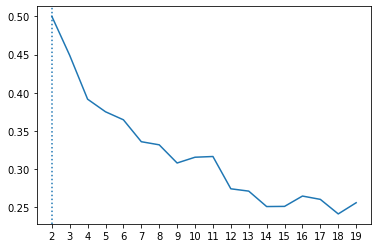

In [15]:
score = []
for i in range(2,20):
    cluster = KMeans(n_clusters=i,random_state=0).fit(data)
    score.append(silhouette_score(data,cluster.labels_))
    
plt.plot(range(2,20),score)
plt.xticks(range(2,20))

plt.axvline(pd.DataFrame(score).idxmax()[0]+2,ls=':')
    

### 建模及可视化分析

In [22]:
cluster = KMeans(n_clusters=3,random_state=0).fit(data)

In [26]:
cluster.cluster_centers_

array([[1.19211578e-04, 2.25760557e-04, 2.62552956e-01, 4.88688735e-01,
        6.77848309e-01, 9.59558880e-02, 2.66152516e-01, 1.00560625e-01],
       [8.42776412e-05, 2.02402987e-04, 9.07702185e-01, 1.71098762e-01,
        2.26180719e-01, 1.50525063e-01, 4.92220601e-02, 7.11860022e-02],
       [1.43337758e-04, 3.56530913e-04, 5.75088384e-01, 2.33244986e-01,
        2.79251677e-01, 6.25424671e-01, 5.37477011e-02, 1.09051837e-01]])

In [34]:
cluster.labels_

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 2, 0, 2, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 2, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1,

In [35]:
# 组合标签和数据
columns = ['Channel','Region','Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
data = pd.DataFrame(data,columns=columns)
data['label'] = cluster.labels_
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,label
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,0
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,0
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,1
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,1


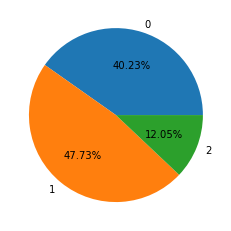

In [59]:
#绘制饼状图
_ = plt.pie(x=data.groupby(by='label',axis=0).count().iloc[:,0],
            labels=data.groupby(by='label',axis=0).count().iloc[:,0].index,
            autopct='%0.2f%%',# 显示概率
            )

In [76]:
#绘制条形图
result = data.groupby(by='label').mean().iloc[:,2:]
result

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
label,,,,,,
0,0.262553,0.488689,0.677848,0.095956,0.266153,0.100561
1,0.907702,0.171099,0.226181,0.150525,0.049222,0.071186
2,0.575088,0.233245,0.279252,0.625425,0.053748,0.109052


<AxesSubplot:xlabel='label'>

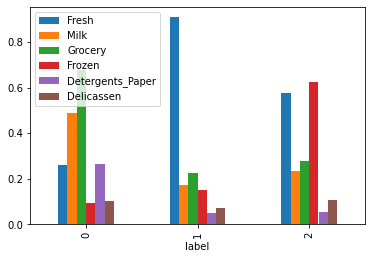

In [77]:
result.plot(kind='bar')